Game of Life Simulation on CUDA
is a popular cellular automaton that simulates the evolution of cells on a 2D grid based on simple rules. It's an ideal candidate for parallel processing because the state of each cell depends only on its neighbouring cells, making it a highly local computation that can be performed in parallel.Problem

Description:
The grid consists of cells that can be either (1) or (0).

The state of each cell in the next generation is determined by its 8 neighbours using the following rules::
A live cell with fewer than two live neighbours dies.:
A live cell with more than three live neighbours dies.:
A dead cell with exactly three live neighbours becomes a live cell.:
A live cell with two or three live neighbours stays alive.

Also, add a visualization of the grid in each generation or save the results in a file to create an animation.

In [ ]:
!nvidia-smi

Thu Oct 10 10:50:46 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [ ]:
def initialize_grid(size):
    return np.random.choice([0, 1], size=(size, size))


In [ ]:
def update_grid(grid):
    new_grid = np.zeros(grid.shape, dtype=int)
    rows, cols = grid.shape

    for i in range(rows):
        for j in range(cols):
            # Count live neighbors
            total = int((grid[i, (j-1)%cols] + grid[i, (j+1)%cols] +
                          grid[(i-1)%rows, j] + grid[(i+1)%rows, j] +
                          grid[(i-1)%rows, (j-1)%cols] + grid[(i-1)%rows, (j+1)%cols] +
                          grid[(i+1)%rows, (j-1)%cols] + grid[(i+1)%rows, (j+1)%cols]))

            # Apply the rules
            if grid[i, j] == 1 and total < 2:
                new_grid[i, j] = 0  # Cell dies
            elif grid[i, j] == 1 and (total == 2 or total == 3):
                new_grid[i, j] = 1  # Cell stays alive
            elif grid[i, j] == 1 and total > 3:
                new_grid[i, j] = 0  # Cell dies
            elif grid[i, j] == 0 and total == 3:
                new_grid[i, j] = 1  # Cell becomes alive

    return new_grid


In [ ]:
def visualize(grid, iteration):
    plt.imshow(grid, cmap='binary')
    plt.title(f'Generation: {iteration}')
    plt.axis('off')
    plt.show()


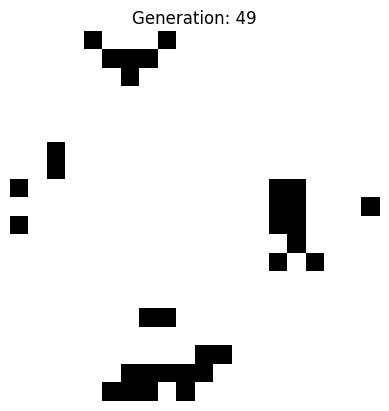

In [ ]:
def game_of_life(size, generations):
    grid = initialize_grid(size)

    for i in range(generations):
        clear_output(wait=True)
        visualize(grid, i)
        grid = update_grid(grid)
        time.sleep(0.1)

game_of_life(20, 50)


In [ ]:
import cuda as cd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

NameError: name 'FuncAnimation' is not defined

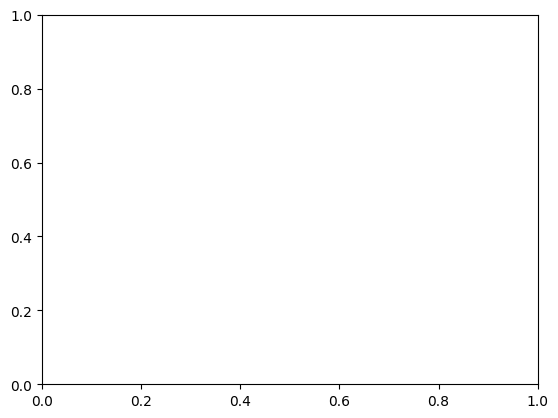

In [ ]:
from matplotlib.animation import PillowWriter

def save_animation(size, generations):
    grid = initialize_grid(size)
    fig, ax = plt.subplots()

    def update(frame):
        ax.clear()
        ax.imshow(grid, cmap='binary')
        ax.set_title(f'Generation: {frame}')
        grid[:] = update_grid(grid)

    ani = FuncAnimation(fig, update, frames=generations, repeat=False)
    ani.save('game_of_life.gif', writer=PillowWriter(fps=10))


save_animation(20, 50)


In [ ]:
class Cube:

    def __init__(self, pos):
        self.entity = None
        self.pos = pos

    def enable(self):

        if self.entity == None:
            self.entity = Entity(model='cube', position=self.pos,
                                 color=color.orange, texture='white_cube', shader=lit_with_shadows_shader)

        self.entity.enabled = True

    def disable(self):

        if self.entity != None:
            self.entity.enabled = False

    def is_enabled(self):

        if self.entity != None:
            return self.entity.enabled

        return False

In [ ]:
# grid
import random

grid = [[0 for x in range(10)] for y in range(10)]
for i in range(10):
    for j in range(10):
        grid[i][j] = random.randint(0, 1)

print(grid)

[[1, 1, 0, 1, 0, 1, 0, 0, 1, 1], [0, 1, 0, 0, 1, 1, 0, 1, 0, 0], [1, 1, 1, 0, 1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 1, 0, 1, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0, 1, 0, 1], [1, 0, 1, 1, 1, 0, 1, 0, 0, 1], [1, 0, 1, 0, 0, 1, 0, 0, 1, 0], [0, 1, 1, 0, 1, 0, 0, 0, 0, 0], [1, 0, 0, 1, 1, 1, 0, 0, 1, 1], [0, 0, 0, 0, 1, 1, 1, 1, 0, 0]]


In [ ]:
!pip install cupy-cuda111  # Adjust for your CUDA version


In [ ]:
import cupy as cp
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time


/usr/local/lib/python3.10/dist-packages/cupy/_environment.py:447: UserWarning: 
--------------------------------------------------------------------------------

  CuPy may not function correctly because multiple CuPy packages are installed
  in your environment:

    cupy-cuda111, cupy-cuda12x

  Follow these steps to resolve this issue:

    1. For all packages listed above, run the following command to remove all
       existing CuPy installations:

         $ pip uninstall <package_name>

      If you previously installed CuPy via conda, also run the following:

         $ conda uninstall cupy

    2. Install the appropriate CuPy package.
       Refer to the Installation Guide for detailed instructions.

         https://docs.cupy.dev/en/stable/install.html

--------------------------------------------------------------------------------

  warnings.warn(f'''


ImportError: 
================================================================
Failed to import CuPy.

If you installed CuPy via wheels (cupy-cudaXXX or cupy-rocm-X-X), make sure that the package matches with the version of CUDA or ROCm installed.

On Linux, you may need to set LD_LIBRARY_PATH environment variable depending on how you installed CUDA/ROCm.
On Windows, try setting CUDA_PATH environment variable.

Check the Installation Guide for details:
  https://docs.cupy.dev/en/latest/install.html

Original error:
  ImportError: libcudart.so.11.0: cannot open shared object file: No such file or directory
================================================================


In [ ]:
def initialize_grid(size):
    """Initialize a grid of given size with random 0s and 1s."""
    return cp.random.choice([0, 1], size=(size, size))


In [ ]:
def update_grid(grid):
    """Update the grid according to Game of Life rules."""
    new_grid = cp.zeros(grid.shape, dtype=int)
    rows, cols = grid.shape

    for i in range(rows):
        for j in range(cols):
            # Count live neighbors using circular boundary conditions
            total = (grid[i, (j-1)%cols] + grid[i, (j+1)%cols] +
                     grid[(i-1)%rows, j] + grid[(i+1)%rows, j] +
                     grid[(i-1)%rows, (j-1)%cols] + grid[(i-1)%rows, (j+1)%cols] +
                     grid[(i+1)%rows, (j-1)%cols] + grid[(i+1)%rows, (j+1)%cols])

            # Apply the rules
            if grid[i, j] == 1 and (total < 2 or total > 3):
                new_grid[i, j] = 0  # Cell dies
            elif grid[i, j] == 1 and (total == 2 or total == 3):
                new_grid[i, j] = 1  # Cell stays alive
            elif grid[i, j] == 0 and total == 3:
                new_grid[i, j] = 1  # Cell becomes alive

    return new_grid


In [ ]:
def visualize(grid, iteration):
    """Visualize the grid."""
    plt.imshow(cp.asnumpy(grid), cmap='binary')
    plt.title(f'Generation: {iteration}')
    plt.axis('off')
    plt.show()


In [ ]:
def game_of_life(size, generations):
    """Run the Game of Life simulation."""
    grid = initialize_grid(size)

    for i in range(generations):
        clear_output(wait=True)  # Clear the output for dynamic visualization
        visualize(grid, i)       # Visualize the current state
        grid = update_grid(grid) # Update the grid for the next generation
        time.sleep(0.1)         # Pause to make the evolution visible

# Run the simulation with a grid size of 20 and 50 generations
game_of_life(20, 50)


In [ ]:
!pip install imageio


In [ ]:
import imageio

def save_animation(size, generations):
    """Save the Game of Life animation as a GIF."""
    grid = initialize_grid(size)
    images = []

    for i in range(generations):
        images.append(cp.asnumpy(grid))  # Store the current grid state for GIF
        grid = update_grid(grid)  # Update for next generation

    # Create and save GIF
    with imageio.get_writer('game_of_life.gif', mode='I', fps=5) as writer:
        for img in images:
            writer.append_data(img * 255)  # Scale to 255 for proper grayscale

# Uncomment to save as GIF
# save_animation(100, 100)  # For larger grid and generations
